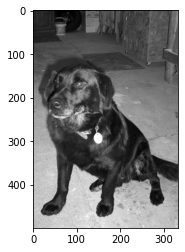

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm


DATADIR = "PetImages/"

CATEGORIES = ["Dog", "Cat"]

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!


In [3]:
print(img_array)

[[ 41  42  43 ... 123 138 135]
 [ 39  40  41 ... 133 143 136]
 [ 40  41  41 ... 139 145 135]
 ...
 [207 194 213 ... 207 198 188]
 [203 190 212 ... 202 191 184]
 [172 168 204 ... 195 182 179]]


In [4]:
print(img_array.shape)

(500, 333)


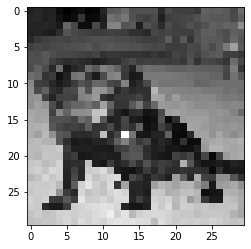

In [5]:
IMG_SIZE = 30

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

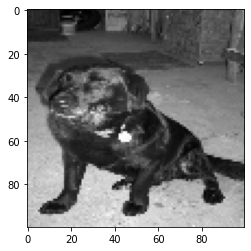

In [6]:
IMG_SIZE = 100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [7]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|██████████| 12501/12501 [00:22<00:00, 544.41it/s]

24946


In [8]:
import random

random.shuffle(training_data)

In [9]:
for sample in training_data[:10]:
    print(sample[1])

0
0
1
0
0
1
0
0
1
0


In [10]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[134]
   [134]
   [132]
   ...
   [ 81]
   [ 88]
   [ 87]]

  [[136]
   [136]
   [133]
   ...
   [ 81]
   [ 89]
   [ 87]]

  [[136]
   [136]
   [135]
   ...
   [ 65]
   [ 49]
   [ 75]]

  ...

  [[124]
   [ 41]
   [ 45]
   ...
   [ 13]
   [ 16]
   [ 18]]

  [[125]
   [ 38]
   [ 43]
   ...
   [ 13]
   [ 17]
   [ 19]]

  [[121]
   [ 40]
   [ 50]
   ...
   [ 13]
   [ 17]
   [ 27]]]]


In [11]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [12]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import numpy as np

import pickle

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape=X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(np.array(X), np.array(y), batch_size=32, epochs=10, validation_split=0.1)

Epoch 1/10
702/702 [==============================] - 181s 258ms/step - loss: 0.6675 - accuracy: 0.6030 - val_loss: 0.6334 - val_accuracy: 0.6453
Epoch 2/10
702/702 [==============================] - 176s 251ms/step - loss: 0.6330 - accuracy: 0.6483 - val_loss: 0.5874 - val_accuracy: 0.7042
Epoch 3/10
702/702 [==============================] - 175s 250ms/step - loss: 0.5604 - accuracy: 0.7162 - val_loss: 0.5048 - val_accuracy: 0.7523
Epoch 4/10
702/702 [==============================] - 192s 274ms/step - loss: 0.4865 - accuracy: 0.7694 - val_loss: 0.4873 - val_accuracy: 0.7756
Epoch 5/10
702/702 [==============================] - 195s 277ms/step - loss: 0.4299 - accuracy: 0.8013 - val_loss: 0.4740 - val_accuracy: 0.7812
Epoch 6/10
702/702 [==============================] - 179s 255ms/step - loss: 0.3929 - accuracy: 0.8217 - val_loss: 0.4577 - val_accuracy: 0.7992
Epoch 7/10
702/702 [==============================] - 181s 257ms/step - loss: 0.3678 - accuracy: 0.8367 - val_loss: 0.4729 -

In [23]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

model = Sequential()

model.add(Conv2D(128, (3, 3), input_shape=X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(np.array(X), np.array(y), batch_size=32, epochs=10, validation_split=0.1)

Epoch 1/10
702/702 [==============================] - 487s 694ms/step - loss: 0.6494 - accuracy: 0.6246 - val_loss: 0.6090 - val_accuracy: 0.6745
Epoch 2/10
307/702 [============>.................] - ETA: 4:35 - loss: 0.5778 - accuracy: 0.7008

KeyboardInterrupt: 